In [1]:
%run data_loader.ipynb
%run utils.ipynb

In [2]:
# Load dataset

dataset = RadarDataset(data_transform, "./data/images_train/")
val_dataset = RadarDataset(data_transform, "./data/images_val/")

data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)

1


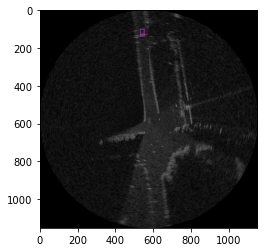

In [3]:
# Check an image from the train data loader
from torchvision.utils import draw_bounding_boxes

# Get an image with a label
for test_images, test_labels in val_data_loader:  
    sample_image = test_images[0]
    sample_label = test_labels[0]

boxes = sample_label['boxes']

# *255 needed when float32 to uint8 (draw_bounding_boxes works only uint8)
sample_image = sample_image*255
img = sample_image.to(torch.uint8)

# Draw an image with bounding boxes
result = draw_bounding_boxes(img, boxes, colors='#FF00FF', width=3)
print(len(boxes))
plt.imshow(result.permute(1, 2, 0))

In [4]:
model = get_model_instance_segmentation(2)
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
# Parameters
num_epochs = 3
lr=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr)

train_epoch_loss_list = []
val_epoch_loss_list = []

print('----------------------train start--------------------------')

for i in range(num_epochs):
    epoch_loss = 0
    val_epoch_loss = 0
    model.train()
  
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating validation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
    
    train_epoch_loss_list.append(mean_epoch_loss)
    val_epoch_loss_list.append(mean_val_epoch_loss)
    
    # Save
    torch.save(model.state_dict(), './model/ex1_'+str(i+1)+'.pt')
    print(f'epoch : {i+1}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 4073/4073 [18:56<00:00,  3.58it/s]


epoch : 1, Train Loss : 0.24966231689932683, Val Loss : 2.686169456426553


Iterating train dataset: 100%|██████████████| 4073/4073 [19:01<00:00,  3.57it/s]


epoch : 2, Train Loss : 0.19819656749485298, Val Loss : 0.23152382209838376


Iterating train dataset: 100%|██████████████| 4073/4073 [18:57<00:00,  3.58it/s]


epoch : 3, Train Loss : 0.17788205558140074, Val Loss : 0.2033287845148639


In [6]:
# Parameters
num_epochs = 12
lr=0.00001

print('----------------------train start--------------------------')

for i in range(num_epochs):
    epoch_loss = 0
    val_epoch_loss = 0
    model.train()
  
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating validation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
    
    train_epoch_loss_list.append(mean_epoch_loss)
    val_epoch_loss_list.append(mean_val_epoch_loss)
    
    # Save
    torch.save(model.state_dict(), './model/ex1_'+str(i+4)+'.pt')
    print(f'epoch : {i+4}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 4073/4073 [18:57<00:00,  3.58it/s]


epoch : 4, Train Loss : 0.15876711812213323, Val Loss : 0.19404259127542728


Iterating train dataset: 100%|██████████████| 4073/4073 [18:41<00:00,  3.63it/s]


epoch : 5, Train Loss : 0.14470275435272012, Val Loss : 0.17780059055373895


Iterating train dataset: 100%|██████████████| 4073/4073 [18:38<00:00,  3.64it/s]


epoch : 6, Train Loss : 0.13218522510929648, Val Loss : 0.1716647902558609


Iterating train dataset: 100%|██████████████| 4073/4073 [18:39<00:00,  3.64it/s]


epoch : 7, Train Loss : 0.12346005689315251, Val Loss : 0.18273081334571786


Iterating train dataset: 100%|██████████████| 4073/4073 [19:08<00:00,  3.55it/s]


epoch : 8, Train Loss : 0.11163328540813944, Val Loss : 0.16638730636863844


Iterating train dataset: 100%|██████████████| 4073/4073 [19:09<00:00,  3.54it/s]


epoch : 9, Train Loss : 0.10396529231728104, Val Loss : 0.15648439757555255


Iterating train dataset: 100%|██████████████| 4073/4073 [19:10<00:00,  3.54it/s]


epoch : 10, Train Loss : 0.09698744703257095, Val Loss : 0.16209548977057003


Iterating train dataset: 100%|██████████████| 4073/4073 [19:15<00:00,  3.53it/s]


epoch : 11, Train Loss : 0.08959531551947245, Val Loss : 0.16604382451623678


Iterating train dataset: 100%|██████████████| 4073/4073 [19:12<00:00,  3.53it/s]


epoch : 12, Train Loss : 0.0831054500230992, Val Loss : 0.18177636407909725


Iterating train dataset: 100%|██████████████| 4073/4073 [19:35<00:00,  3.47it/s]


epoch : 13, Train Loss : 0.07857614995583823, Val Loss : 0.156888519001274


Iterating train dataset: 100%|██████████████| 4073/4073 [19:41<00:00,  3.45it/s]


epoch : 14, Train Loss : 0.07449712877644497, Val Loss : 0.18646027770362736


Iterating train dataset: 100%|██████████████| 4073/4073 [19:35<00:00,  3.46it/s]


epoch : 15, Train Loss : 0.07037197992392205, Val Loss : 0.19746038276064173


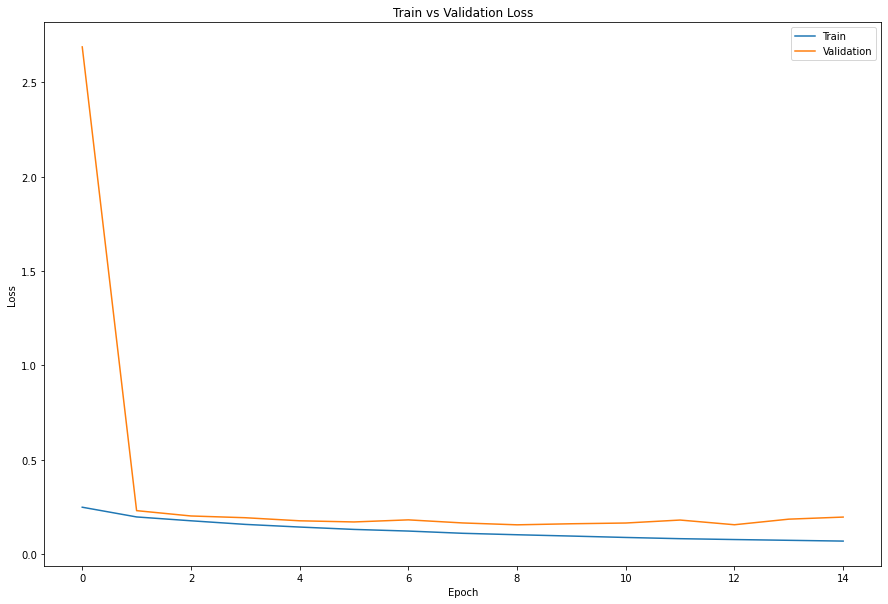

In [7]:
y1 = train_epoch_loss_list
y2 = val_epoch_loss_list
x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Train")
plt.plot(x, y2, label = "Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()